In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read CSV
unemployed_data_one = pd.read_csv("../Resources/unemployment_2010-2015.csv")
unemployed_data_two = pd.read_csv("../Resources/unemployment_2016-2020.csv")

In [3]:
print(unemployed_data_one.columns)

print(unemployed_data_two.columns)

Index(['Country Name', 'Country Code', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object')
Index(['Country Name', 'Country Code', '2016', '2017', '2018', '2019', '2020'], dtype='object')


In [4]:
unemployed_data_one.dtypes

Country Name     object
Country Code     object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
dtype: object

In [5]:
unemployed_data_one.shape

(235, 8)

In [6]:
unemployed_data_two.dtypes

Country Name     object
Country Code     object
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
dtype: object

In [7]:
unemployed_data_two.shape

(235, 7)

In [8]:
list(unemployed_data_one['Country Name'])==list(unemployed_data_two['Country Name'])

True

In [9]:
# Merge our two data frames together
merged_data = unemployed_data_one.merge(unemployed_data_two, on='Country Name')

merged_data.head()

,Country Name,Country Code_x,2010,2011,2012,2013,2014,2015,Country Code_y,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,6.879694,6.730720,6.578243,6.480673,6.414462,6.468598,AFE,6.546351,6.523061,6.414392,6.472269,6.814177
1,Afghanistan,AFG,11.520000,11.510000,11.520000,11.540000,11.450000,11.390000,AFG,11.310000,11.180000,11.060000,10.980000,11.730000
2,Africa Western and Central,AFW,4.471161,4.466731,4.560139,4.356187,4.640632,4.547113,AFW,5.486480,5.927104,5.910615,5.928926,6.300105
3,Angola,AGO,9.430000,7.360000,7.370000,7.380000,7.310000,7.260000,AGO,7.200000,7.100000,7.000000,6.930000,7.700000
4,Albania,ALB,14.090000,13.480000,13.380000,15.870000,18.060000,17.190000,ALB,15.420000,13.620000,12.300000,11.470000,11.700000


In [10]:
merged_data.shape

(235, 14)

In [11]:
merged_data.columns

Index(['Country Name', 'Country Code_x', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Country Code_y', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [12]:
# del merged_data['Country Code_y']

In [13]:
# Delete the duplicate 'Country Code' column and rename the first one back to 'Country Code'
merged_data = merged_data.drop('Country Code_y', axis=1)

In [14]:
merged_data = merged_data.rename(columns={'Country Code_x' : 'Country Code'})
merged_data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,6.879694,6.730720,6.578243,6.480673,6.414462,6.468598,6.546351,6.523061,6.414392,6.472269,6.814177
1,Afghanistan,AFG,11.520000,11.510000,11.520000,11.540000,11.450000,11.390000,11.310000,11.180000,11.060000,10.980000,11.730000
2,Africa Western and Central,AFW,4.471161,4.466731,4.560139,4.356187,4.640632,4.547113,5.486480,5.927104,5.910615,5.928926,6.300105
3,Angola,AGO,9.430000,7.360000,7.370000,7.380000,7.310000,7.260000,7.200000,7.100000,7.000000,6.930000,7.700000
4,Albania,ALB,14.090000,13.480000,13.380000,15.870000,18.060000,17.190000,15.420000,13.620000,12.300000,11.470000,11.700000


In [15]:
# Set the 'Country Code' to be our index for easy referencing of rows
merged_data = merged_data.set_index('Country Code')

merged_data.head(5)

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,,,
AFE,Africa Eastern and Southern,6.879694,6.730720,6.578243,6.480673,6.414462,6.468598,6.546351,6.523061,6.414392,6.472269,6.814177
AFG,Afghanistan,11.520000,11.510000,11.520000,11.540000,11.450000,11.390000,11.310000,11.180000,11.060000,10.980000,11.730000
AFW,Africa Western and Central,4.471161,4.466731,4.560139,4.356187,4.640632,4.547113,5.486480,5.927104,5.910615,5.928926,6.300105
AGO,Angola,9.430000,7.360000,7.370000,7.380000,7.310000,7.260000,7.200000,7.100000,7.000000,6.930000,7.700000
ALB,Albania,14.090000,13.480000,13.380000,15.870000,18.060000,17.190000,15.420000,13.620000,12.300000,11.470000,11.700000


In [16]:
# Collect the mean unemployment rates for the world
mean_unemployment = merged_data[['2010', '2011', '2012', '2013', '2014', '2015', '2016',
                                 '2017', '2018', '2019', '2020']].mean()

# Collect the years where data was collected
years = list(mean_unemployment.index)

In [17]:
merged_data.loc['ALB', ['2010', '2011', '2012', '2013', '2014', '2015', '2016',
                                 '2017', '2018', '2019', '2020']]

2010    14.09
2011    13.48
2012    13.38
2013    15.87
2014    18.06
2015    17.19
2016    15.42
2017    13.62
2018     12.3
2019    11.47
2020     11.7
Name: ALB, dtype: object

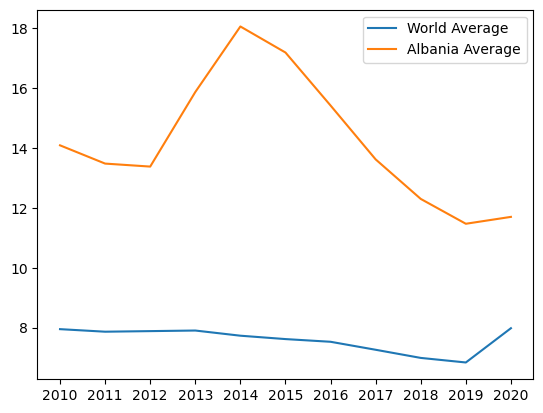

In [24]:
# Plot the world average as a line chart
world_avg, = plt.plot(years, mean_unemployment, label='World Average')

# Plot the unemployment values for a single country - ALB
country, = plt.plot(years, merged_data.loc['ALB', ['2010', '2011', '2012', '2013', '2014', '2015', '2016',
                                 '2017', '2018', '2019', '2020']], label='Albania Average')

# Create a legend for our chart
plt.legend(handles=[world_avg, country], loc='best')

# Show the chart
plt.show()

In [25]:
mean_unemployment

2010    7.949476
2011    7.864397
2012    7.883905
2013    7.903511
2014    7.730817
2015    7.617846
2016    7.527750
2017    7.260905
2018    6.988844
2019    6.836369
2020    7.981232
dtype: float64

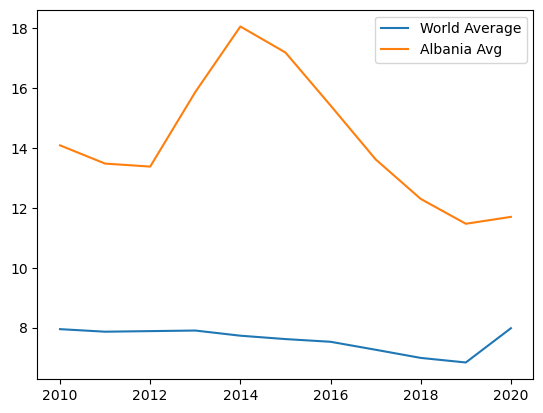

In [21]:
# Plot the same data using the Pandas plot function
mean_unemployment.plot(kind='line', label="World Average")
merged_data.loc['ALB', ['2010', '2011', '2012', '2013', '2014', '2015', '2016',
                                 '2017', '2018', '2019', '2020']].plot(kind='line', label="Albania Avg")
plt.legend()
plt.show()